---
author: Delvin Mackenzie
date: 10/20/2019
contact: delvin@uw.edu


<h1>Iperf Dedicated host analysis: Single dedicated host VS two dedicated host.</h1>
<p>Here we analyze statistical differences between running iperf on a shared C4 dedicated host between clients and servers, and two separate C4 dedicated hosts where clients and servers are placed separately.</p>

In [136]:

#import dependencies 
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np

import math  

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import pyplot as plt

import pandas as pd
import os

<h3>1. Import data</h3>

In [137]:
print(os.listdir("./Iaas_Data"))

['iperf c4 single dedicated host 8x clients 8x hosts - Sheet1.csv', '.DS_Store', 'iperf_c4_aug1 - iperf_c4_aug1.csv']


In [138]:
#import csv files
single_host = pd.read_csv("./Iaas_Data/iperf c4 single dedicated host 8x clients 8x hosts - Sheet1.csv", header = 1)
double_host = pd.read_csv("./Iaas_Data/iperf_c4_aug1 - iperf_c4_aug1.csv", header = 2)

In [139]:
double_host.head()

,instanceID,instanceType,experimentID,interval,bandwidthUpload,bandwitdhDownload,Upload,Download,setId,vmId,cmd,Upload.1,Download.1,Upload.2,Download.2,Total
0,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,566 Mbits/sec,576 Mbits/sec,566.0,576.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
1,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,581 Mbits/sec,577 Mbits/sec,581.0,577.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
2,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,574 Mbits/sec,580 Mbits/sec,574.0,580.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
3,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,582 Mbits/sec,578 Mbits/sec,582.0,578.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
4,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579 Mbits/sec,577 Mbits/sec,579.0,577.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN


In [140]:
single_host.head()

,instanceID,instanceType,experimentID,interval,bandwidthUpload,bandwitdhDownload,Upload,Download,setId,vmId,cmd,Upload.1,Download.1,Upload.2,Download.2,Total
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581 Mbits/sec,578 Mbits/sec,581.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580 Mbits/sec,578 Mbits/sec,580.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581 Mbits/sec,579 Mbits/sec,581.0,579.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582 Mbits/sec,578 Mbits/sec,582.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580 Mbits/sec,579 Mbits/sec,580.0,579.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN


We have our csv data imported, we can see that single_host has some column headers missing. That is okay though, since they are duplicates from column 4 and 5, just without the trailing text.

<h3>2. Let's clean up our dataframe before we dive into analysis.</h3>

In [141]:
#drop non essential columns
double_host = double_host.drop(columns = ['Upload.2', 'Download.2', 'cmd', 'bandwidthUpload', 'bandwitdhDownload', 'Upload.1', 'Download.1', 'Total'])
single_host = single_host.drop(columns = ['Upload.2', 'Download.2', 'cmd', 'bandwidthUpload', 'bandwitdhDownload', 'Upload.1', 'Download.1', 'Total'])

In [142]:
single_host.head()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,578.0,1.0,1.0
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,578.0,1.0,1.0
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,579.0,1.0,1.0
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582.0,578.0,1.0,1.0
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,579.0,1.0,1.0


In [143]:
#create new column for total bandwidth
single_host['total'] = single_host['Upload']+ single_host['Download']
double_host['total'] = double_host['Upload']+ double_host['Download']

In [144]:
single_host.head()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,578.0,1.0,1.0,1159.0
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,578.0,1.0,1.0,1158.0
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,579.0,1.0,1.0,1160.0
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582.0,578.0,1.0,1.0,1160.0
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,579.0,1.0,1.0,1159.0


In [145]:
single_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
instanceID      396 non-null object
instanceType    396 non-null object
experimentID    396 non-null float64
interval        396 non-null object
Upload          396 non-null float64
Download        396 non-null float64
setId           396 non-null float64
vmId            396 non-null float64
total           396 non-null float64
dtypes: float64(6), object(3)
memory usage: 28.1+ KB


In [146]:
#drop NaN rows
double_host = double_host.dropna()
single_host = single_host.dropna()

Next let's get familiar with the data and look at the high level details.

In [147]:
double_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1.564714e+09,522.720588,373.891711,11.000000,6.000000,896.612299
std,0.000000e+00,108.842973,141.321575,3.874278,3.874278,206.610103
min,1.564714e+09,97.000000,165.000000,1.000000,1.000000,274.000000
25%,1.564714e+09,442.000000,257.000000,8.000000,3.000000,734.750000
50%,1.564714e+09,580.000000,326.000000,12.000000,5.000000,899.000000
75%,1.564714e+09,596.000000,498.250000,14.000000,9.000000,1050.000000
max,1.564714e+09,673.000000,671.000000,16.000000,16.000000,1285.000000


In [148]:
single_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.571384e+09,522.558081,342.416667,5.666667,3.333333,864.974747
std,0.000000e+00,90.821450,132.645375,1.974521,1.974521,196.074242
min,1.571384e+09,186.000000,129.000000,1.000000,1.000000,461.000000
25%,1.571384e+09,443.000000,247.000000,4.000000,2.000000,724.500000
50%,1.571384e+09,567.000000,300.000000,6.000000,3.000000,869.500000
75%,1.571384e+09,595.000000,410.500000,7.000000,5.000000,998.250000
max,1.571384e+09,672.000000,662.000000,8.000000,8.000000,1287.000000


Several points to note here are that the std is much wider in the two dedicated host configuration. Another interesting point is the min upload for the single host configuration is 186 vs 97 for the two host configuration. This may be an outlier but we should investigate this to make sure.

An easy and intuitive way to check this is to see how many data points are between 90 and 186 for the two host configuration. 

In [149]:
double_host.loc[double_host['Upload'] <= 186]

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total
1051,i-0d386fae4c84b0150,c4.large,1.564714e+09,15.0 sec,167.0,372.0,14.0,10.0,539.0
1416,i-06f0eb9830ad02618,c4.large,1.564714e+09,15.0 sec,97.0,177.0,16.0,7.0,274.0


There are only two instances below 186. So I think it is safe to conclude they are likely outliers.

In [150]:
double_host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1495
Data columns (total 9 columns):
instanceID      1496 non-null object
instanceType    1496 non-null object
experimentID    1496 non-null float64
interval        1496 non-null object
Upload          1496 non-null float64
Download        1496 non-null float64
setId           1496 non-null float64
vmId            1496 non-null float64
total           1496 non-null float64
dtypes: float64(6), object(3)
memory usage: 116.9+ KB


In [151]:
single_host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 9 columns):
instanceID      396 non-null object
instanceType    396 non-null object
experimentID    396 non-null float64
interval        396 non-null object
Upload          396 non-null float64
Download        396 non-null float64
setId           396 non-null float64
vmId            396 non-null float64
total           396 non-null float64
dtypes: float64(6), object(3)
memory usage: 30.9+ KB


We notice that the single_host data only contains 396 rows, while the double_host contains 1496 rows. This may be an issue when administering a t-test. <h6>we could look to bootstrap?</h6>
<h3>3. Visualization</h3>

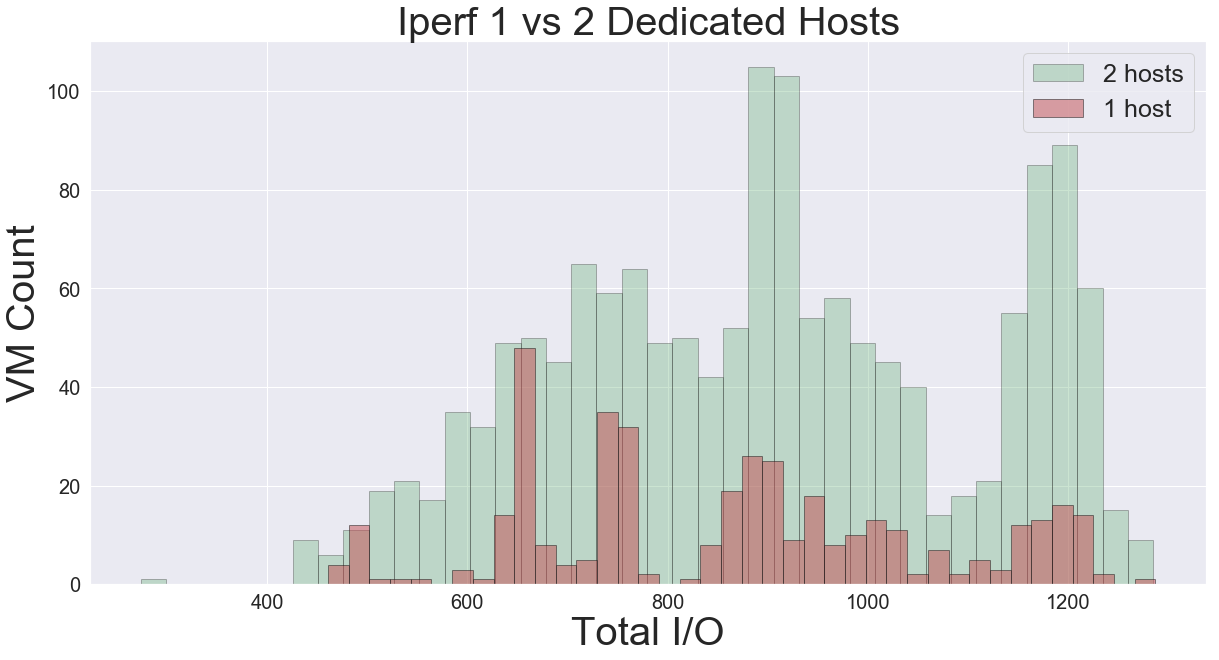

In [210]:
#plot overlay of datasets
plt.figure(figsize = (20, 10))
plt.hist(double_host['total'], bins=40, color='g', edgecolor='k', alpha=0.3)
plt.hist(single_host['total'], bins=40, color='r', edgecolor='k', alpha=0.5)
plt.xlabel('Total I/O', fontSize =40)
plt.xticks(fontSize =20)
plt.yticks(fontSize = 20)
plt.legend(['2 hosts','1 host'], prop={'size': 25})
plt.ylabel('VM Count', fontSize =40)
plt.title('Iperf 1 vs 2 Dedicated Hosts', fontSize =40)
plt.show()

<h3>4. T test</h3>

We want to perform a t-test between the two datasets to see if there are any significant differences. we ill set alpha to 0.05. Our null hypothesis is that there is no remarkable difference between the two datasets. We will perform a t-test on the total bandwidth between the two datasets.

In [153]:
#compute t-test
def printTTest(single, double, count):
    print('t-test for setId '+ str(count) +' upload: ' + str(stats.ttest_ind(single['Upload'],double['Upload'], equal_var = False)))
    print('t-test for setId '+ str(count) +' download: ' + str(stats.ttest_ind(single['Download'],double['Download'], equal_var = False)))
    print('t-test for setId '+ str(count) +' total: ' + str(stats.ttest_ind(single['total'],double['total'], equal_var = False)))
    
printTTest(single_host, double_host, 'all')

t-test for setId all upload: Ttest_indResult(statistic=-0.030308521426614183, pvalue=0.9758293446437107)
t-test for setId all download: Ttest_indResult(statistic=-4.140685264091497, pvalue=3.9175157445880576e-05)
t-test for setId all total: Ttest_indResult(statistic=-2.8227772503016757, pvalue=0.004907383583759384)


Interestingly we see that the download speeds and total speeds reject the null hypotesis, where the upload speeds does not. This tells us that the upload speeds between the two datasets are relatively similiar and statistically insignificant, where download speeds are statistically significant.

In [154]:
single_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.571384e+09,522.558081,342.416667,5.666667,3.333333,864.974747
std,0.000000e+00,90.821450,132.645375,1.974521,1.974521,196.074242
min,1.571384e+09,186.000000,129.000000,1.000000,1.000000,461.000000
25%,1.571384e+09,443.000000,247.000000,4.000000,2.000000,724.500000
50%,1.571384e+09,567.000000,300.000000,6.000000,3.000000,869.500000
75%,1.571384e+09,595.000000,410.500000,7.000000,5.000000,998.250000
max,1.571384e+09,672.000000,662.000000,8.000000,8.000000,1287.000000


In [155]:
double_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1.564714e+09,522.720588,373.891711,11.000000,6.000000,896.612299
std,0.000000e+00,108.842973,141.321575,3.874278,3.874278,206.610103
min,1.564714e+09,97.000000,165.000000,1.000000,1.000000,274.000000
25%,1.564714e+09,442.000000,257.000000,8.000000,3.000000,734.750000
50%,1.564714e+09,580.000000,326.000000,12.000000,5.000000,899.000000
75%,1.564714e+09,596.000000,498.250000,14.000000,9.000000,1050.000000
max,1.564714e+09,673.000000,671.000000,16.000000,16.000000,1285.000000


In [156]:
#t-test manually

def tTestManual(mean1, mean2, std1, std2, n1, n2):
    return (mean1 - mean2)/ math.sqrt((std1**2/n1)+ (std2**2/n2))

In [157]:
#t-test for download speed
tTestManual(342.416667,373.891711,132.645375,141.321575, 396,1496)

-4.140685196354299

In [158]:
#compute std, t-test, and essential metrics for each experiment group like on the google sheet
def computeTTest(single, double):
    for i in range(2, int(double['setId'].max())+1,2):
        #since single has less setIds, we skip every other row for double
        printTTest((single.loc[single['setId'] == i/2]) , (double.loc[double['setId'] == i]), i)
        print()
        
    

In [159]:
computeTTest(single_host, double_host);

t-test for setId 2 upload: Ttest_indResult(statistic=-2.4667291848578885, pvalue=0.02137792883894147)
t-test for setId 2 download: Ttest_indResult(statistic=-1.1477959800076845, pvalue=0.2614781737992037)
t-test for setId 2 total: Ttest_indResult(statistic=-2.604568748468629, pvalue=0.014187937369777838)

t-test for setId 4 upload: Ttest_indResult(statistic=-0.07321655559315503, pvalue=0.9418622053684124)
t-test for setId 4 download: Ttest_indResult(statistic=0.6731881303463566, pvalue=0.5032566415844685)
t-test for setId 4 total: Ttest_indResult(statistic=0.5215615384690365, pvalue=0.6037952496312365)

t-test for setId 6 upload: Ttest_indResult(statistic=0.08924530702596555, pvalue=0.9292076506614713)
t-test for setId 6 download: Ttest_indResult(statistic=-0.21819184832462382, pvalue=0.8278754155360216)
t-test for setId 6 total: Ttest_indResult(statistic=-0.20285332110727983, pvalue=0.8397804947758937)

t-test for setId 8 upload: Ttest_indResult(statistic=1.4830190212372316, pvalue=0.

<h3>5. Machine Learning Model</h3>
Let's use the data from each set to see if there are any patterns that can be used for machine learning models.

In [179]:
single_host.tail()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total,dataset,std_Download,std_Upload,std_total
391,i-02cae7f2b9543d876,c4.large,1.571384e+09,15.0 sec,444.0,245.0,8.0,8.0,689.0,1,40.921158,69.363933,80.650257
392,i-02cae7f2b9543d876,c4.large,1.571384e+09,15.0 sec,461.0,235.0,8.0,8.0,696.0,1,40.921158,69.363933,80.650257
393,i-02cae7f2b9543d876,c4.large,1.571384e+09,15.0 sec,312.0,167.0,8.0,8.0,479.0,1,40.921158,69.363933,80.650257
394,i-02cae7f2b9543d876,c4.large,1.571384e+09,15.0 sec,324.0,164.0,8.0,8.0,488.0,1,40.921158,69.363933,80.650257
395,i-02cae7f2b9543d876,c4.large,1.571384e+09,15.0 sec,393.0,290.0,8.0,8.0,683.0,1,40.921158,69.363933,80.650257


In [178]:
#merge data and add column to show which dataset each row comes from
def mergeDf1Df2(df1, df2):
    df1['dataset'] = "1"
    df2['dataset'] = "2"
    return pd.concat([df1, df2])

In [180]:
df_merged = mergeDf1Df2(single_host,double_host)

Now create a method to run machine learning model and print confusion matrix and f1-score.
We need to import sklearn dependencies first though.

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [163]:
#runs given model 
def get_model_result(X, y, model = KNeighborsClassifier(), test_size = 0.3):
    '''prints the confusion matrix and classification report and returns fitted model and X, y values'''
    
    
    X_train,X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 21,
                                                     #   stratify = y
                                                      )
    
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Model Score: ')
    print(model.score(X_test, y_test))
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))
    
    return X_train, X_test, y_train, y_test, model

In [182]:
def splitDfIntoXY(df):
    y = df['dataset'].values
    x = df.drop(columns=['dataset', 'interval', 'experimentID', 'instanceType', 'instanceID', 'setId', 'vmId'])
    return x, y

In [183]:
df_x, dataSet_y = splitDfIntoXY(df_merged)

In [184]:
df_x.head()

,Upload,Download,total,std_Download,std_Upload,std_total
0,581.0,578.0,1159.0,10.763575,4.118694,14.814612
1,580.0,578.0,1158.0,10.763575,4.118694,14.814612
2,581.0,579.0,1160.0,10.763575,4.118694,14.814612
3,582.0,578.0,1160.0,10.763575,4.118694,14.814612
4,580.0,579.0,1159.0,10.763575,4.118694,14.814612


In [166]:
#K Neighbors Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,KNeighborsClassifier())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Model Score: 
0.823943661971831

Confusion Matrix: 
[[ 60  58]
 [ 42 408]]

              precision    recall  f1-score   support

           1       0.59      0.51      0.55       118
           2       0.88      0.91      0.89       450

    accuracy                           0.82       568
   macro avg       0.73      0.71      0.72       568
weighted avg       0.82      0.82      0.82       568



In [167]:
#Logistic Regression
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,LogisticRegression())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Model Score: 
0.7922535211267606

Confusion Matrix: 
[[  0 118]
 [  0 450]]

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       118
           2       0.79      1.00      0.88       450

    accuracy                           0.79       568
   macro avg       0.40      0.50      0.44       568
weighted avg       0.63      0.79      0.70       568



/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [168]:
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model Score: 
0.7975352112676056

Confusion Matrix: 
[[ 62  56]
 [ 59 391]]

              precision    recall  f1-score   support

           1       0.51      0.53      0.52       118
           2       0.87      0.87      0.87       450

    accuracy                           0.80       568
   macro avg       0.69      0.70      0.70       568
weighted avg       0.80      0.80      0.80       568



/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Since download gave a significant p-value, we should see what happens when we drop the other columns and only use download as our feature.

In [169]:
dataSet_y = df_merged['dataset'].values
df_x = df_merged.drop(columns=['total', 'dataset', 'interval', 'experimentID', 'instanceType', 'instanceID', 'setId', 'vmId'])

In [170]:
#Random Forest Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model Score: 
0.795774647887324

Confusion Matrix: 
[[ 55  63]
 [ 53 397]]

              precision    recall  f1-score   support

           1       0.51      0.47      0.49       118
           2       0.86      0.88      0.87       450

    accuracy                           0.80       568
   macro avg       0.69      0.67      0.68       568
weighted avg       0.79      0.80      0.79       568



/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [171]:
#K Neighbors Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,KNeighborsClassifier())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Model Score: 
0.8221830985915493

Confusion Matrix: 
[[ 62  56]
 [ 45 405]]

              precision    recall  f1-score   support

           1       0.58      0.53      0.55       118
           2       0.88      0.90      0.89       450

    accuracy                           0.82       568
   macro avg       0.73      0.71      0.72       568
weighted avg       0.82      0.82      0.82       568



In [172]:
#what happens if we add std average for the set as a feature?

In [173]:
#create row for sandard deviation grouped by setId
def stdBySetId(df, column, nRow):
    df['std_'+column] = 1; #initialize row
    for i in range(1, nRow+1):
        std = df[column].loc[df['setId'] == i].std()
        df['std_'+column].loc[df['setId'] ==i] = std;

In [174]:
double_host.tail()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total,dataset
1491,i-03a3eaea8c8d0fb1f,c4.large,1.564714e+09,15.0 sec,424.0,309.0,16.0,14.0,733.0,2
1492,i-03a3eaea8c8d0fb1f,c4.large,1.564714e+09,15.0 sec,438.0,410.0,16.0,14.0,848.0,2
1493,i-03a3eaea8c8d0fb1f,c4.large,1.564714e+09,15.0 sec,443.0,343.0,16.0,14.0,786.0,2
1494,i-03a3eaea8c8d0fb1f,c4.large,1.564714e+09,15.0 sec,321.0,427.0,16.0,14.0,748.0,2
1495,i-03a3eaea8c8d0fb1f,c4.large,1.564714e+09,15.0 sec,569.0,422.0,16.0,14.0,991.0,2


In [175]:
stdBySetId(single_host,'Download',8)
stdBySetId(single_host,'Upload',8)
stdBySetId(single_host,'total',8)

stdBySetId(double_host,'Download',16)
stdBySetId(double_host,'Upload',16)
stdBySetId(double_host,'total',16)

/Users/dell/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [177]:
double_host.head(200)

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total,dataset,std_Download,std_Upload,std_total
0,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,566.0,576.0,1.0,1.0,1142.0,2,1.902152,6.771598,5.987867
1,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,581.0,577.0,1.0,1.0,1158.0,2,1.902152,6.771598,5.987867
2,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,574.0,580.0,1.0,1.0,1154.0,2,1.902152,6.771598,5.987867
3,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,582.0,578.0,1.0,1.0,1160.0,2,1.902152,6.771598,5.987867
4,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579.0,577.0,1.0,1.0,1156.0,2,1.902152,6.771598,5.987867
5,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579.0,577.0,1.0,1.0,1156.0,2,1.902152,6.771598,5.987867
6,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579.0,578.0,1.0,1.0,1157.0,2,1.902152,6.771598,5.987867
7,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,581.0,578.0,1.0,1.0,1159.0,2,1.902152,6.771598,5.987867
8,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,561.0,583.0,1.0,1.0,1144.0,2,1.902152,6.771598,5.987867
9,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579.0,578.0,1.0,1.0,1157.0,2,1.902152,6.771598,5.987867


In [226]:
#get new test set with std added as features
df_merged = mergeDf1Df2(single_host,double_host)
df_x, dataSet_y = splitDfIntoXY(df_merged)

In [186]:
#K Neighbors Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,KNeighborsClassifier())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Model Score: 
0.9507042253521126

Confusion Matrix: 
[[ 99  19]
 [  9 441]]

              precision    recall  f1-score   support

           1       0.92      0.84      0.88       118
           2       0.96      0.98      0.97       450

    accuracy                           0.95       568
   macro avg       0.94      0.91      0.92       568
weighted avg       0.95      0.95      0.95       568



kNN Looks pretty good. Let's try random forest

In [187]:
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model Score: 
1.0

Confusion Matrix: 
[[118   0]
 [  0 450]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00       450

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568



/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Perfect? something must be wrong... let's debug.

In [188]:
df_x.head()

,Upload,Download,total,std_Download,std_Upload,std_total
0,581.0,578.0,1159.0,10.763575,4.118694,14.814612
1,580.0,578.0,1158.0,10.763575,4.118694,14.814612
2,581.0,579.0,1160.0,10.763575,4.118694,14.814612
3,582.0,578.0,1160.0,10.763575,4.118694,14.814612
4,580.0,579.0,1159.0,10.763575,4.118694,14.814612


We can see right away that multiple rows have the same values, making it very easy for models to overfit. We need to take out the std columns.

In [194]:
df_x = df_x.drop(columns =['std_Download', 'std_Upload', 'std_total'])

Since kNN worked pretty well earlier, lets explore different k values.
Here we will write a function to compute k values for 1~15.

In [195]:

def get_model_comp_curve(X, y, test_size=0.3):
    #split data up
    X_train,X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 21,
                                                     #   stratify = y
                                                      )
    
    # Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 15)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    # Loop over different values of k
    for i, k in enumerate(neighbors):
        # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors = k)

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

        #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)

    # Generate plot
    plt.title('k-NN: Varying Number of Neighbors')
    plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

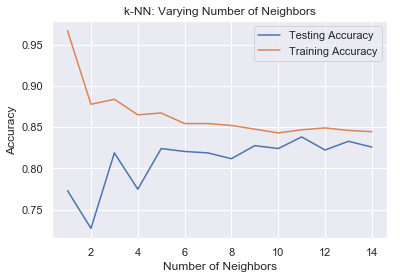

In [196]:
get_model_comp_curve(df_x, dataSet_y)

In [204]:
#K Neighbors Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,KNeighborsClassifier(n_neighbors=11))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
Model Score: 
0.8380281690140845

Confusion Matrix: 
[[ 54  64]
 [ 28 422]]

              precision    recall  f1-score   support

           1       0.66      0.46      0.54       118
           2       0.87      0.94      0.90       450

    accuracy                           0.84       568
   macro avg       0.76      0.70      0.72       568
weighted avg       0.82      0.84      0.83       568



Our precision for dataset 1 went up from 0.59 to 0.66 which is good. Our recall went down to 0.46 from 0.51. metrics for dataset 2 are good, but this seems to be a case of overfitting.

I have an idea. Let's try some more feature engineering. Let's start by adding columns for upload - download, download - upload. We don't have much data to work with, but this could help fine tune the models.

In [211]:
df_merged.head()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total,dataset,std_Download,std_Upload,std_total
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,578.0,1.0,1.0,1159.0,1,10.763575,4.118694,14.814612
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,578.0,1.0,1.0,1158.0,1,10.763575,4.118694,14.814612
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,579.0,1.0,1.0,1160.0,1,10.763575,4.118694,14.814612
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582.0,578.0,1.0,1.0,1160.0,1,10.763575,4.118694,14.814612
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,579.0,1.0,1.0,1159.0,1,10.763575,4.118694,14.814612


In [227]:
df_merged['up-down'] = df_merged['Upload']-df_merged['Download']
#df_merged['down-up'] = df_merged['Download']-df_merged['Upload']

In [228]:
#get new test set with std added as features
df_x, dataSet_y = splitDfIntoXY(df_merged)
df_x = df_x.drop(columns =['std_Download', 'std_Upload', 'std_total'])

In [229]:
df_x.head()

,Upload,Download,total,up-down
0,581.0,578.0,1159.0,3.0
1,580.0,578.0,1158.0,2.0
2,581.0,579.0,1160.0,2.0
3,582.0,578.0,1160.0,4.0
4,580.0,579.0,1159.0,1.0


Now that we have our new features, let's try kNN and random forest again

In [230]:
#K Neighbors Classifier
X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,KNeighborsClassifier(n_neighbors=11))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
Model Score: 
0.8362676056338029

Confusion Matrix: 
[[ 53  65]
 [ 28 422]]

              precision    recall  f1-score   support

           1       0.65      0.45      0.53       118
           2       0.87      0.94      0.90       450

    accuracy                           0.84       568
   macro avg       0.76      0.69      0.72       568
weighted avg       0.82      0.84      0.82       568



In [225]:

X_train, X_test, y_train, y_test, model = get_model_result(df_x, dataSet_y,RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model Score: 
0.801056338028169

Confusion Matrix: 
[[ 59  59]
 [ 54 396]]

              precision    recall  f1-score   support

           1       0.52      0.50      0.51       118
           2       0.87      0.88      0.88       450

    accuracy                           0.80       568
   macro avg       0.70      0.69      0.69       568
weighted avg       0.80      0.80      0.80       568



/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
